## Лабораторна робота №4. Ансамблі моделей
Варіант 8

In [1]:
import numpy as np
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

Було взято другий набір даних з лабораторної роботи №2 - make_circles. Візуалізуємо його.

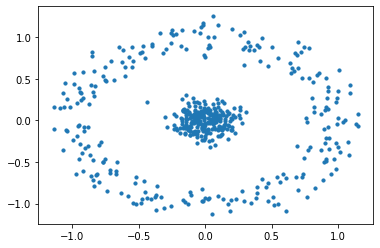

In [2]:
X, y = make_circles(n_samples=500, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], s=10)

Розбиваємо наші данні на тренувальний та перевірочний набори.

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

Стандартизуємо наші дані.

In [4]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Створюємо модель нейронних мереж MLPClassifier та підбираємо гіпермараметри згідно з варіантом з допомогою решітчатого пошуку. Клас GridSearchCV самостійно розбиває передані в нього тренувальні піднабори на валідаційні вибірки. <br>
Багатошаровими персептронами називають нейронні мережі прямого розповсюдження. Вхідний сигнал у таких мережах поширюється прямому напрямку, від шару до шару. Багатошаровий персептрон у загальному поданні складається з наступних елементів:<br>
множини вхідних вузлів, які утворюють вхідний шар;<br>
одного або кількох прихованих шарів обчислювальних нейронів;<br>
одного вихідного шару нейронів.<br><br>
Гіперпараметри: <br>
warm_start - повторно використовувати рішення попереднього виклику<br>
early_stopping - використовувати ранню зупинку для припинення навчання, якщо оцінка перевірки не покращується. Якщо
встановлено значення true, автоматично припиняє навчання, коли оцінка перевірки не покращиться щонайменше протягом
n_iter_no_change послідовних епох.<br>
hidden_layer_sizes - і-й елемент представляє кількість нейронів в i-му прихованому шарі

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

mlp = MLPClassifier(warm_start=True, early_stopping = True, max_iter = 1000)

params = {
'hidden_layer_sizes' : [50, 100, 250, 500]
}

print("\tGrid Search:")
gridSearch = GridSearchCV(estimator=mlp, param_grid=params, cv=5, refit = True, verbose=3)
gridSearch.fit(X_train, y_train)
print(f"Best params: {gridSearch.best_params_}")
print(f"Best score: {gridSearch.best_score_}")

	Grid Search:
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END .............hidden_layer_sizes=50;, score=0.875 total time=   0.2s
[CV 2/5] END .............hidden_layer_sizes=50;, score=0.662 total time=   0.0s
[CV 3/5] END .............hidden_layer_sizes=50;, score=0.988 total time=   0.1s
[CV 4/5] END .............hidden_layer_sizes=50;, score=1.000 total time=   0.1s
[CV 5/5] END .............hidden_layer_sizes=50;, score=0.975 total time=   0.1s
[CV 1/5] END ............hidden_layer_sizes=100;, score=0.950 total time=   0.1s
[CV 2/5] END ............hidden_layer_sizes=100;, score=0.975 total time=   0.1s
[CV 3/5] END ............hidden_layer_sizes=100;, score=0.475 total time=   0.0s
[CV 4/5] END ............hidden_layer_sizes=100;, score=0.475 total time=   0.0s
[CV 5/5] END ............hidden_layer_sizes=100;, score=0.475 total time=   0.1s
[CV 1/5] END ............hidden_layer_sizes=250;, score=0.963 total time=   0.1s
[CV 2/5] END ............hidden_lay

Модель видає найкращі результати з п'ятистами нейронами у прихованому шарі. <br>
Будуємо криву втрат.

First 3 and last 3 iteration of Loss curve

0.7148887134800518
0.7023809302277816
0.6901150394413581
0.47349796983579895
0.4641032815132361
0.4549178955247802


Text(0.5, 1.0, 'Loss curve')

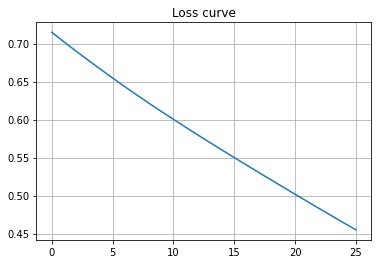

In [6]:
mlp = MLPClassifier(warm_start = True, early_stopping = True, hidden_layer_sizes = 250, solver='adam')
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

loss = mlp.loss_curve_

print("First 3 and last 3 iteration of Loss curve\n")
for i in [0, 1, 2, -3,-2, -1]: print(loss[i])

plt.plot(loss)
plt.grid(True)
plt.title("Loss curve")

In [7]:
print(f"MLPClassifier score: {mlp.score(X_test, y_test)}")

MLPClassifier score: 0.98


Виводимо оцінки якості нашої класифікації за допомогою функції classification_report. <br>
Accuracy - доля вірних відповідей у загальній кількості відповідей. <br>
Precision - відповідність наданих міток справжнім значенням. <br>
Recall - доля вірно класифікованих об'єктів у загальній кількості даного класу.<br>
F1 - середнє гармонічне двох попередніх метрик.<br>
Macro avg обчислює метрику незалежно для кожного класу, а потім бере середнє.<br>
Weighted avg враховує різний ступінь важливості чисел у наборі даних.<br>

In [8]:
from sklearn.metrics import classification_report
print(f"Quality metrics\n{classification_report(y_pred, y_test)}")

Quality metrics
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        60
           1       0.95      1.00      0.98        40

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



Матриця неточностей показує які класи як були класифіковані. Показує деальний результат, якщо заповнена лише діагональ.

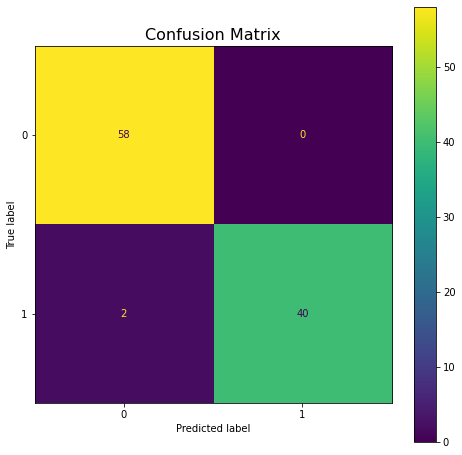

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(8,8))
plt.title("Confusion Matrix", fontsize=16)
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax)

ROC-крива вказує долю істинно позитивних класифікацій по відношенню до долі хибно позитивних класифікацій.
AUC - площа під ROC-кривою є одним із способів порівняння класифікаторів.

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

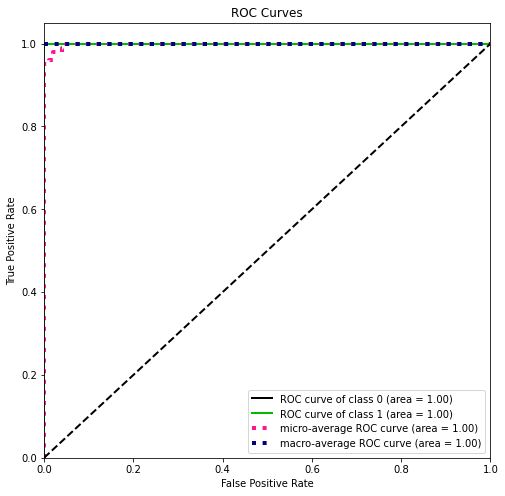

In [10]:
import scikitplot as skplt
predicted_probas = mlp.predict_proba(X_test)
fig, ax = plt.subplots(figsize=(8,8))
skplt.metrics.plot_roc(y_test, predicted_probas, ax=ax)

Будуємо ансамблі моделей VotingClassifier. <br>
Класифікатор голосування — це модель машинного навчання, яка тренується на ансамблі численних моделей і прогнозує вихід (клас) на основі їх найвищої ймовірності вибраного класу як результату.<br>
Він просто об’єднує результати кожного класифікатора, переданого в класифікатор голосування, і прогнозує вихідний клас на основі більшості голосів. Ідея полягає в тому, щоб замість того, щоб створювати окремі виділені моделі та знаходити точність для кожної з них, ми створюємо єдину модель, яка тренується за цими моделями і прогнозує вихід на основі їх сукупної більшості голосів за кожен вихідний клас.<br><br>

Класифікатор голосування підтримує два типи голосування.<br>
Жорстке голосування: під час жорсткого голосування прогнозований вихідний клас — це клас з більшістю голосів, тобто клас, який мав найвищу ймовірність бути передбаченим кожним із класифікаторів. <br>
М’яке голосування: при м’якому голосуванні вихідний клас є прогнозом на основі середньої ймовірності, наданої цьому класу. <br><br>
weights - послідовність ваг (float або int) для зважування випадків передбачуваних міток класів (жорстке голосування) або ймовірностей класів перед усередненням (м’яке голосування). Використовує однакові ваги, якщо None.

In [11]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

params = {
    'voting' : ['hard', 'soft'],
    'weights': [ [1,1], [2,2], [4,4] ]
}

estimators = [ ('dt', DecisionTreeClassifier()),
('kmeans', KNeighborsClassifier())]

vc = VotingClassifier(estimators=estimators)

print("\tGrid Search:")
gridSearch = GridSearchCV(estimator=vc, param_grid=params, cv=5, refit = True, verbose=3)
gridSearch.fit(X_train, y_train)
print(f"Best params: {gridSearch.best_params_}")
print(f"Best score: {gridSearch.best_score_}")


	Grid Search:
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .......voting=hard, weights=[1, 1];, score=0.988 total time=   0.0s
[CV 2/5] END .......voting=hard, weights=[1, 1];, score=0.988 total time=   0.0s
[CV 3/5] END .......voting=hard, weights=[1, 1];, score=0.988 total time=   0.0s
[CV 4/5] END .......voting=hard, weights=[1, 1];, score=0.988 total time=   0.0s
[CV 5/5] END .......voting=hard, weights=[1, 1];, score=1.000 total time=   0.0s
[CV 1/5] END .......voting=hard, weights=[2, 2];, score=0.988 total time=   0.0s
[CV 2/5] END .......voting=hard, weights=[2, 2];, score=0.988 total time=   0.0s
[CV 3/5] END .......voting=hard, weights=[2, 2];, score=0.988 total time=   0.0s
[CV 4/5] END .......voting=hard, weights=[2, 2];, score=0.988 total time=   0.0s
[CV 5/5] END .......voting=hard, weights=[2, 2];, score=1.000 total time=   0.0s
[CV 1/5] END .......voting=hard, weights=[4, 4];, score=0.988 total time=   0.0s
[CV 2/5] END .......voting=hard, we

Випадковий ліс – це ансамбль дерев прийняття рішень, які навчаються зазвичай методом беггінга або іноді вставки і, як правило, з параметром max_samples рівним розміру навчальної вибірки. <br><br>
max_samples (int or float, default=None) - zкщо bootstrap має значення True, кількість вибірок, які потрібно взяти з X для навчання кожного базового оцінювача.<br><br>
max_features{“auto”, “sqrt”, “log2”}, int or float, default=”auto” - кількість ознак, які слід враховувати при пошуку найкращого спліту:<br>
Якщо “auto”, то max_features=sqrt(n_features).<br>
Якщо “sqrt”, то max_features=sqrt(n_features).<br>
Якщо “log2”, то max_features=log2(n_features).<br>
Якщо None, то max_features=n_features.<br><br>
min_samples_split (int or float, default=2) - мінімальна кількість прикладів, необхідних для розділення внутрішнього вузла

In [12]:
rfc = RandomForestClassifier(bootstrap=True)

params = {
    'max_samples' : [100, 250, 320],
    'max_features': [ 'auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 3]
}

print("\tGrid Search:")
gridSearch = GridSearchCV(estimator=rfc, param_grid=params, cv=5, refit = True, verbose=3, error_score='raise')
gridSearch.fit(X_train, y_train)
print(f"Best params: {gridSearch.best_params_}")
print(f"Best score: {gridSearch.best_score_}")

	Grid Search:
Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END max_features=auto, max_samples=100, min_samples_split=2;, score=1.000 total time=   0.2s
[CV 2/5] END max_features=auto, max_samples=100, min_samples_split=2;, score=1.000 total time=   0.1s
[CV 3/5] END max_features=auto, max_samples=100, min_samples_split=2;, score=0.975 total time=   0.1s
[CV 4/5] END max_features=auto, max_samples=100, min_samples_split=2;, score=1.000 total time=   0.1s
[CV 5/5] END max_features=auto, max_samples=100, min_samples_split=2;, score=1.000 total time=   0.1s
[CV 1/5] END max_features=auto, max_samples=100, min_samples_split=3;, score=0.988 total time=   0.1s
[CV 2/5] END max_features=auto, max_samples=100, min_samples_split=3;, score=1.000 total time=   0.1s
[CV 3/5] END max_features=auto, max_samples=100, min_samples_split=3;, score=0.975 total time=   0.1s
[CV 4/5] END max_features=auto, max_samples=100, min_samples_split=3;, score=0.988 total time=   0.1s
[CV 5/5

Графік залежності метрики f1 від кількості оцінювачів в ансамблі. В основному вже з 50-ти прогнозаторів значення стає 1.00, проте, в залежності від згенерованих даних, графік одразу стає горизонтальною лінією. Також при малій кількості прогнозаторів (приблизно 1-5) значення коливається від 0.976 до 0.990. 

Text(0, 0.5, 'F1')

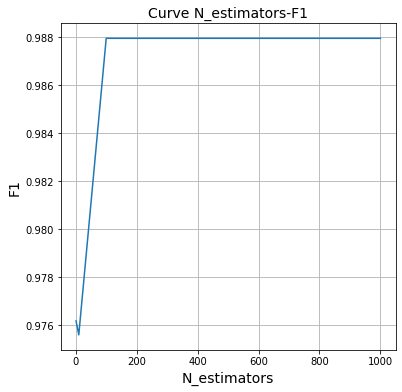

In [13]:
from sklearn.metrics import f1_score

f1 = []
n_estim = [1, 10, 100, 500, 1000]

for n in n_estim:
    y_pred = RandomForestClassifier(n_estimators = n).fit(X_train, y_train).predict(X_test)
    f1.append(f1_score(y_test, y_pred))

plt.figure(figsize = (6, 6))
plt.grid(True)
plt.plot(n_estim, f1)
plt.title("Curve N_estimators-F1", fontsize = 14)
plt.xlabel("N_estimators", fontsize = 14)
plt.ylabel("F1", fontsize = 14)

Оut-of-bag - приклади, які не використовувалися під час баггінгу. Чим менше було непомічено прикладів, тим оцінка вища.

In [14]:
rfc = RandomForestClassifier(warm_start = True, oob_score = True, n_estimators = 10,
     bootstrap = True, random_state = 42, max_features= 'auto', max_samples=100, min_samples_split= 3)
rfc.fit(X_train, y_train)
print(f'oob_score_ : {rfc.oob_score_:.5f}')

oob_score_ : 0.98750


In [15]:
estimators = [ ('mlp', MLPClassifier(warm_start=True, early_stopping = True, max_iter = 1000, hidden_layer_sizes=250)),
('rf', RandomForestClassifier(warm_start = True, oob_score = True, n_estimators = 10,
     bootstrap = True, random_state = 42, max_features= 'auto', max_samples=100, min_samples_split= 3))]

vc_h = VotingClassifier(estimators=estimators, voting = 'hard').fit(X_train, y_train)
y_pred_vc_h = vc_h.predict(X_test)

print(f"Quality metrics for VotingClassifier\n{classification_report(y_pred_vc_h, y_test)}")
print(f"Score for VotingClassifier : {vc_h.score(X_test, y_test)}")

Quality metrics for VotingClassifier
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       0.98      1.00      0.99        41

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

Score for VotingClassifier : 0.99


In [16]:
vc_s = VotingClassifier(estimators=estimators, voting = 'soft').fit(X_train, y_train)
y_pred_vc_s = vc_s.predict(X_test)

print(f"Quality metrics for VotingClassifier\n{classification_report(y_pred_vc_s, y_test)}")
print(f"Score for VotingClassifier : {vc_s.score(X_test, y_test)}")

Quality metrics for VotingClassifier
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       0.98      1.00      0.99        41

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

Score for VotingClassifier : 0.99


In [17]:
from itertools import product

def plot(X):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    f, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(10, 10))

    for idx, clf, tt in zip(
        product([0, 1], [0, 1]),
        [mlp, rfc, vc_s, vc_h],
        ["MLPClassifier", "RandomForestCls", "VCls Soft", "VCls Hard"],):

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
        axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
        axarr[idx[0], idx[1]].set_title(tt)

    plt.show()

Візуалізуємо границі рішень. В основному Багатошаровий пересептрон та VotingClassifier з жорстким голосуванням показують найкращі результити - границі охоплюють внутрішній клас та не зачіпають зовнишнє кільце.

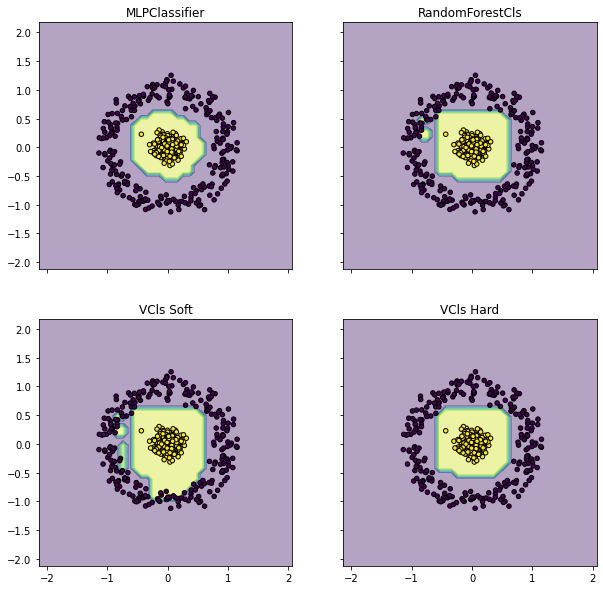

In [18]:
plot(X)

## Висновки
Через простоту даних, швидкість навчання індивідуальних моделей та ансамблів майже однаково мінімальна, проте VotingClassifier з багатошаровим персептроном та RandomForest все таки працює трішки довше. <br>
Згідно границь рішень можна встановити, у яких моделей присутнє перенавчання - границі занадто викревлені. Багатошаровий персептрон та класифікація на основі голосів з жорстким голосуванням показують найкращі результати.